# Finite Difference Methods for Option Pricing

### Intro:


Finite Difference Methods (FDM) are widely recognized numerical techniques in computational finance, frequently used to solve differential equations by approximating them as difference equations. Known for their simplicity and historical significance, FDM represents one of the earliest approaches for addressing differential equations, with their application to numerical problems dating back to the 1950s.

In this quick project, I would like to show you how to apply Finite Difference Methods in the context of Option Pricing. FDM shares similarities with (binomial) tree models in its conceptual framework. However, instead of discretizing asset prices and time using a tree structure, FDM discretizes on a grid, dividing both time and asset price into small intervals and calculating values at every grid point.

Below the primary approaches to FDM:

- #### Explicit
- #### Implicit
- #### Crank-Nicolson methods


The explicit method is straightforward to implement but is sensitive to the size of time and asset steps, which can lead to convergence issues. It is generally less stable compared to implicit or Crank-Nicolson methods. The implicit method, while more stable, requires solving a system of equations, making it computationally intensive. The Crank-Nicolson approach combines features of both explicit and implicit methods, offering a balance between stability and computational efficiency.

Finite Difference Methods are particularly suitable for low-dimensional problems, typically up to four dimensions, making them ideal for scenarios like pricing options or solving partial differential equations (PDEs) related to financial models.

### Additional Interesting Insights about FDM:

1. #### Flexibility in Applications: 

FDM is not limited to finance; it is also extensively used in engineering, physics, and other sciences for tasks like heat transfer, fluid dynamics, and electromagnetic field modeling.

2. #### Grid Customization: 

Advanced implementations allow for adaptive grids, where grid spacing changes dynamically based on the problem's complexity, improving both accuracy and efficiency.

3. #### Boundary Condition Management: 

FDM can accommodate complex boundary conditions, such as Dirichlet or Neumann boundaries, which are common in real-world financial and physical systems.

4. #### Integration with Stochastic Models: 

FDM can be combined with stochastic differential equations to model scenarios with uncertainty, broadening its applicability in risk analysis.

5. #### Historical Evolution: 

While its roots trace back to the mid-20th century, modern advancements in computational power have significantly enhanced the usability of FDM, enabling it to tackle more sophisticated problems with higher precision.

6. #### Comparison with Finite Element Methods (FEM):

While both FDM and FEM solve differential equations, FDM is preferred for problems with simpler geometries, whereas FEM excels in complex geometrical domains.


## Black Scholes PDE 

In this section, let's take a look on the famous Black-Scholes Partial Differential Equation:

\begin{equation}
{\frac {\partial V}{\partial t}}+{\frac {1}{2}}\sigma ^{2}S^{2}{\frac {\partial ^{2}V}{\partial S^{2}}}+rS{\frac {\partial V}{\partial S}} - rV = 0
\end{equation}


This has a well-known closed-form solution, but let's pretend to use a Numerical Method to obtain the solution, hence differentiation using the grid.
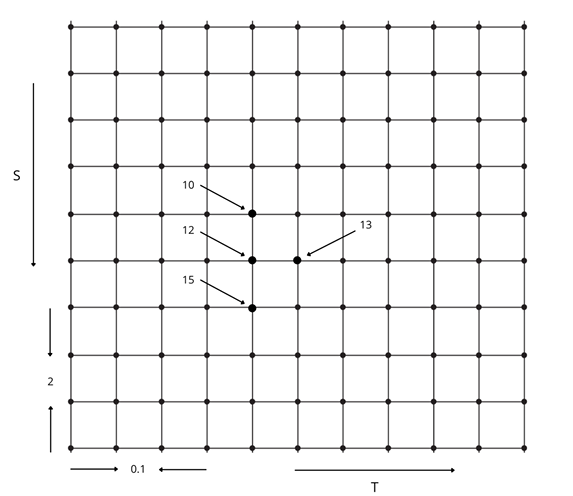


##### Time to Maturity Step:

$t=T - k\delta t$ 

where $0 \leq k \leq K$

##### Asset Step:

$S=i\delta s$

where $0 \leq i \leq I$

Here i and k are respective steps in the grid and we can write the value of the option at each grid points as:

$V^k_i = V(iδS,T −kδt)$


### Greeks Approximation

The Black-Scholes equation can be written as in terms of the Greeks, as:

$Θ+\frac{1}{2}σ^2S^2Γ+rS∆−rV =0$

##### Theta:

${\displaystyle {\frac {\partial V}{\partial t}} = \lim_{h \to 0} \frac{V(S,t+h)-V(S,t)}{h} }$

which becomes in terms of grid points:

${\displaystyle {\frac {\partial V}{\partial t}} \approx \frac{V^k_i - V^{k+1}_i}{\delta t}}$


##### Delta:

${\displaystyle {\frac {\partial V}{\partial S}} \approx \frac{V^k_{i+1}- V^{k}_{i-1}}{2 \delta S}}$


##### Gamma:

${\displaystyle {\frac {\partial ^2 V}{\partial S^2}} \approx \frac{V^k_{i+1}-2V^k_i + V^{k}_{i-1}}{\delta S^2}}$


And now let's get to the code!


### The FDM Framework 

In [1]:
# Importing Libraries
import warnings
warnings.filterwarnings('ignore')
# Importing libraries
import pandas as pd
from numpy import *
# Import cufflinks
import cufflinks as cf
cf.set_config_file(offline=True, dimensions=((1000,600)))
# Set max row and columns to 300 and 100
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt


In [2]:
# Specify the parameters for FDM
T = 1 # time to maturity in years
E = 100 # strike price
r = 0.05 # riskfree rate
vol = 0.20 # volatility
Flag = -1 # Flag = 1 for call, -1 for puts
EType = 1 # EType = 1 for american, 0 for european
NAS = 20 # number of asset steps
ds = 2* E / NAS # asset step size
dt = (0.9/vol**2/NAS**2) # time step size, for stability
NTS = int(T / dt) + 1 # number of time steps
dt = T / NTS # time step size [Expiration as int # of time steps away]

#### Creating the Grid

In [3]:
# Create asset steps i*ds
s = arange(0, (NAS+1)*ds,ds)
s

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120., 130., 140., 150., 160., 170., 180., 190., 200.])

In [4]:
# Create time steps k*dt
t = T-arange(NTS*dt,-dt,-dt)
t

array([0.        , 0.05555556, 0.11111111, 0.16666667, 0.22222222,
       0.27777778, 0.33333333, 0.38888889, 0.44444444, 0.5       ,
       0.55555556, 0.61111111, 0.66666667, 0.72222222, 0.77777778,
       0.83333333, 0.88888889, 0.94444444, 1.        ])

In [5]:
# Verify the steps size
s.shape, t.shape

((21,), (19,))

In [6]:
# Initialize the grid with zeros
grid = zeros((len(s),len(t)))
# Subsume the grid points into a dataframe
# with asset price as index and time steps as columns
grid = pd.DataFrame(grid, index=s, columns=around(t,3))
grid

,0.000,0.056,0.111,0.167,0.222,0.278,0.333,0.389,0.444,0.500,0.556,0.611,0.667,0.722,0.778,0.833,0.889,0.944,1.000
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Set Payoff at Expiration
if Flag == 1:
    grid.iloc[:,0] = maximum(s - E, 0)
else:
    grid.iloc[:,0] = maximum(E - s, 0)
    
# Store payoff for early exercise
p = []
for j in arange(0, NAS+1):
    p.append(grid.iloc[j,0])
    
p


[100.0,
 90.0,
 80.0,
 70.0,
 60.0,
 50.0,
 40.0,
 30.0,
 20.0,
 10.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

#### Filling the Grid with the Different Prices

In [8]:
# k is counter
for k in range(1, len(t)):
    for i in range(1,len(s)-1):
        # defining the greeks
        delta = (grid.iloc[i+1,k-1] - grid.iloc[i-1,k-1]) / (2*ds)
        gamma = (grid.iloc[i+1,k-1]-2*grid.iloc[i,k-1]+grid.iloc[i-1,k-1]) /(ds**2)
        theta = (-0.5* vol**2 * s[i]**2 * gamma) - (r*s[i]*delta) + (r*grid.iloc[i,k-1])
        # Vnew = Vold - theta*dt
        grid.iloc[i,k] = grid.iloc[i,k-1] - (theta*dt)
    # Set boundary condition at S = 0
    grid.iloc[0,k] = grid.iloc[0,k-1] * (1-r*dt) # ds = rsdt + sigma*sdx, s= 0,ds=0
    
    # Set boundary condition at S = infinity # gamma = 0, (Delta 1) so you can linearly extract
    grid.iloc[len(s)-1,k] = 2*grid.iloc[len(s)-2,k] - grid.iloc[len(s)-3,k]
    
    # american exercise vs European
    if EType==1:
        for i in range(0,len(s)):
            grid.iloc[i,k] = maximum(grid.iloc[i,k], p[i])
            
     

            
grid          
  

,0.000,0.056,0.111,0.167,0.222,0.278,0.333,0.389,0.444,0.500,0.556,0.611,0.667,0.722,0.778,0.833,0.889,0.944,1.000
0.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
10.0,90.0,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
20.0,80.0,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
30.0,70.0,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
40.0,60.0,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
50.0,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
60.0,40.0,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
70.0,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
80.0,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
90.0,10.0,10.000000,10.000000,10.000000,10.000000,10.010213,10.059701,10.134814,10.226230,10.327552,10.434378,10.543677,10.653370,10.762042,10.868746,10.972861,11.074000,11.171935,11.266558


In [9]:
# Print out stock, payoff and option value
data = {"Stock": s,"Payoff": p,"Option": grid.iloc[:,-1]}
option_value_2D = pd.DataFrame(data)
option_value_2D

,Stock,Payoff,Option
0.0,0.0,100.0,100.000000
10.0,10.0,90.0,90.000000
20.0,20.0,80.0,80.000000
30.0,30.0,70.0,70.000000
40.0,40.0,60.0,60.000000
50.0,50.0,50.0,50.000000
60.0,60.0,40.0,40.000000
70.0,70.0,30.0,30.000000
80.0,80.0,20.0,20.000000
90.0,90.0,10.0,11.266558


In [10]:
# Plot option value and payoff
option_value_2D[['Payoff', 'Option']].iplot(title='Payoff & Option Value')

### A Finite Difference Methods Function

In [11]:
def fdm_option(strike, sigma, rate, ttm, nas, is_call=True, american=False):
    """This function calculates option prices in a Finite Difference Methods
    fashion, and has the following arguments:
    - strike (strike price)
    - sigma (implied volatility)
    - rate (interest rate)
    - time to expiry
    - stability parameter
    - is_call (a flag variable to identify Calls or Puts)
    - american (a flag exercise variable)
    """
 # Specify flag as 1 for calls and-1 for puts
 # Specify american=True for early exercise and False for european
    
    # Input variables
    ds = 2*strike/nas
    dt = 0.9/sigma**2/nas**2
    nts = int(ttm / dt) + 1
    dt = ttm/nts
    s = arange(0,(nas+1)*ds,ds)
    t = ttm-arange(nts*dt,-dt,-dt)
    
    # Initialize the Grid
    grid = zeros((len(s),len(t)))
    grid = pd.DataFrame(grid, index=s, columns=around(t,2))
    
    # Set boundary condition at Expiration
    flag = 1 if is_call else-1
    grid.iloc[:,0] = abs(maximum(flag * (s- strike), 0))
    
    
    # Store payoff for early exercise
    p = []
    for j in arange(0, nas+1):
        p.append(grid.iloc[j,0])
    
    # Greeks Calculation
    for k in range(1, len(t)):
        for i in range(1,len(s)-1):
            delta = (grid.iloc[i+1,k-1]- grid.iloc[i-1,k-1]) / (2*ds)
            gamma = (grid.iloc[i+1,k-1]-2*grid.iloc[i,k-1]+grid.iloc[i-1,k-1]) /(ds**2)
            theta = (-0.5* sigma**2 * s[i]**2 * gamma)- (rate*s[i]*delta)+(rate*grid.iloc[i,k-1])
            
            
            grid.iloc[i,k] =  grid.iloc[i,k-1]- dt*theta
        
        # Set boundary condition at S = 0
        grid.iloc[0,k] = grid.iloc[0,k-1] * (1-rate*dt)
        # Set boundary condition at S = infinity
        grid.iloc[len(s)-1,k] = abs(2*(grid.iloc[len(s)-2,k])- grid.iloc[len(s)-3,k])
        
        # Check for early exercise
        if american==True:
            for i in range(0,len(s)):
                grid.iloc[i,k] = maximum(grid.iloc[i,k], p[i])
                
    return around(grid,2)

In [12]:
# Call the function to price options
fdm_grid = fdm_option(100,0.2,0.05,1,20)
fdm_grid

,0.00,0.06,0.11,0.17,0.22,0.28,0.33,0.39,0.44,0.50,0.56,0.61,0.67,0.72,0.78,0.83,0.89,0.94,1.00
0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
20.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
30.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
40.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
60.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,0.03,0.04,0.05,0.07
70.0,0.0,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.03,0.04,0.07,0.09,0.13,0.16,0.21,0.26,0.31,0.37,0.43
80.0,0.0,0.00,0.00,0.01,0.04,0.08,0.14,0.22,0.31,0.42,0.53,0.66,0.80,0.94,1.10,1.25,1.42,1.58,1.75
90.0,0.0,0.00,0.13,0.34,0.59,0.88,1.18,1.49,1.81,2.13,2.45,2.77,3.08,3.39,3.70,4.00,4.31,4.60,4.90


In [13]:
# Output the option values
call = fdm_option(100,0.2,0.05,1,60,is_call=True, american=True).loc[100,1]
put = fdm_option(100,0.2,0.05,1,60,is_call=False, american=True).loc[100,1]
# Print the values
print(f"Call Option Value is {call:0.4f}")
print(f"Put Option Value is {put:0.4f}")

Call Option Value is 10.4300
Put Option Value is 6.0700


In [14]:
# Plot Option Payoff
 # Axis titles are not rendered correctly on the graph. This is a bug in cufflinks
fig = fdm_grid.iplot(kind = 'surface', title='Option values by Explicit FDM',xTitle='Spot', yTitle='Maturiy', zTitle='Option Value', asFigure=True)
fig.show()

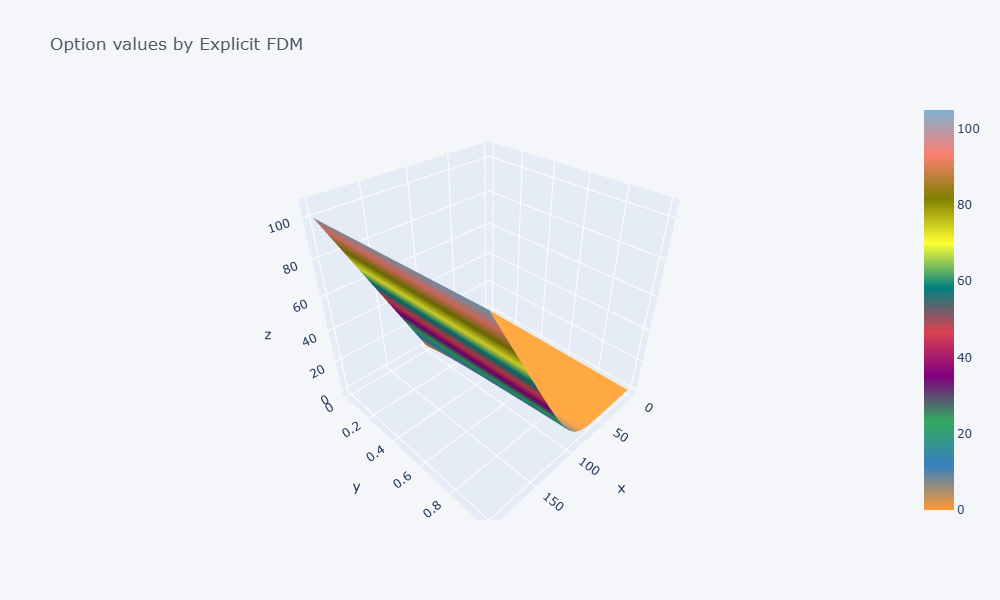